In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
np.set_printoptions(precision=3)
%matplotlib inline
plt.style.use('ggplot')

## Exercise 1: Linear Algebra

In [43]:
def kernel_trick_check(n, p, lambd):
    X = np.random.normal(scale=np.sqrt(5), size=(n, p))
    y = np.random.uniform(-1, 1, n)
    
    left_side = X.T @ np.linalg.solve(X @ X.T + lambd * np.eye(n), y)
    right_side = np.linalg.solve(X.T @ X + lambd * np.eye(p), X.T) @ y
    
    if np.allclose(left_side, right_side, rtol=1e-05, atol=1e-05):
        print(f'For n = {n} and p = {p}, the property checks !')
    else:
        print(f'For n = {n} and p = {p}, the property does not check...')

### Question 1.a: Checking property for n = 100, p = 2000

In [44]:
kernel_trick_check(100, 2000, 10 ** (-5))

For n = 100 and p = 2000, the property checks !


### Question 1.b: Checking property for n = 2000, p = 100

In [45]:
kernel_trick_check(2000, 100, 10 ** (-5))

For n = 2000 and p = 100, the property checks !


### Question 2: Timing the kernel trick

In [46]:
def kernel_trick_timer(n, p, lambd):
    X = np.random.normal(scale=np.sqrt(5), size=(n, p))
    y = np.random.uniform(-1, 1, n)
    
    start_left = time.time()
    left_side = X.T @ np.linalg.solve(X @ X.T + lambd * np.eye(n), y)
    timing_left = time.time() - start_left
    
    
    start_right = time.time()
    right_side = np.linalg.solve(X.T @ X + lambd * np.eye(p), X.T) @ y
    timing_right = time.time() - start_right
    
    if timing_left < timing_right:
        fastest_side = 'left'
        fastest_time = timing_left
    else:
        fastest_side = 'right'
        fastest_time = timing_right
    return (f'The fastest computation time for n = {n} and p = {p} is {fastest_time:.4f} seconds, obtained with the {fastest_side} side')


print(kernel_trick_timer(2000, 100, 10 ** (-5)))
print(kernel_trick_timer(100, 2000, 10 ** (-5)))

The fastest computation time for n = 2000 and p = 100 is 0.0015 seconds, obtained with the right side
The fastest computation time for n = 100 and p = 2000 is 0.0003 seconds, obtained with the left side


#####  We notice that when n >> p, it is more time efficient to compute the quantity in (1) using the right hand side formulation because it deals with pxp sized matrices. Whereas it is more time efficient to compute the quantity in (1) using the left hand side formulation when p >> n because it deals with nxn sized matrices.

## Exercise 2: Random Matrix Spectrum

### Question 3: Random matrices generator

In [47]:
def matrix_generator(n, p, distribution):
    distribution = distribution.lower()
    if distribution == 'logistic':
        return np.random.logistic(0, np.sqrt(6) / np.pi, (n, p))
    elif distribution == 'uniform':
        return np.random.uniform(-np.sqrt(6), np.sqrt(6), (n, p))
    elif distribution == ('student'):
        return np.random.standard_t(4, (n, p))
    else:
        print('Pick one of these distributions: logistic, uniform or student')       

### Question 4: Plotting Singular Values

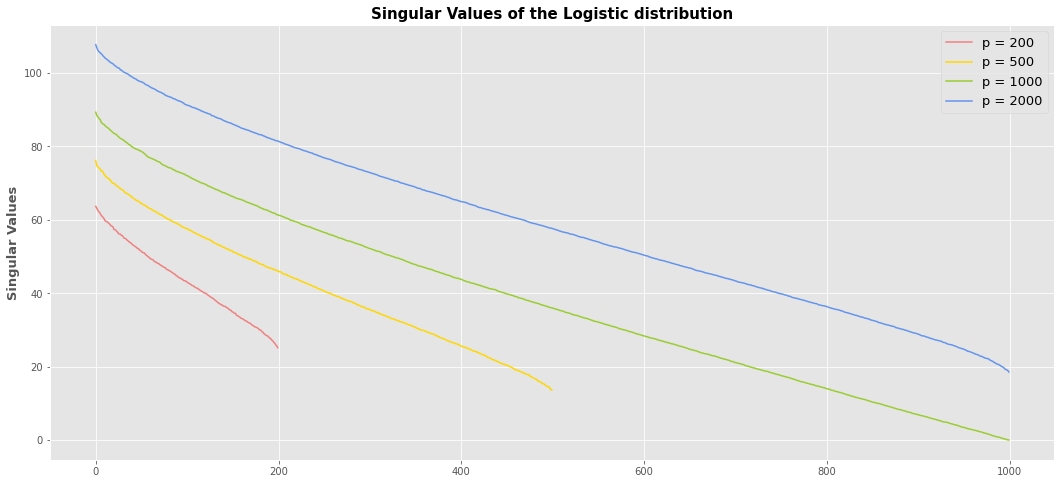

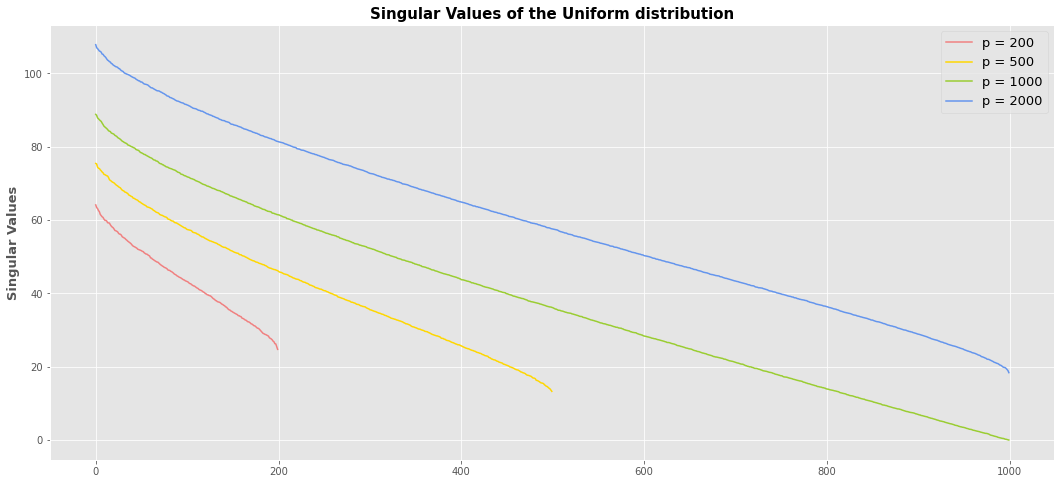

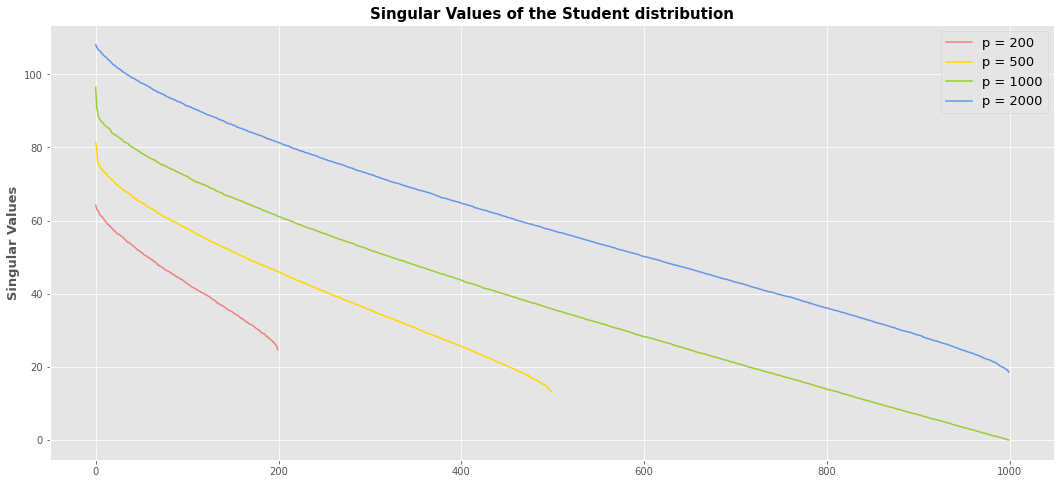

In [48]:
distributions = ['Logistic', 'Uniform', 'Student']
n = 1000
p_values = [200, 500, 1000, 2000]

colors = ['lightcoral', 'gold', 'yellowgreen', 'cornflowerblue']

for dist in distributions:
    plt.figure(figsize=(18, 8))   
    for p in p_values:
        plt.plot(np.linalg.svd(matrix_generator(n, p, dist))[1], color=colors[p_values.index(p)], label=f'p = {p}')
    plt.title(f'Singular Values of the {dist} distribution', fontsize=15, fontweight='bold')
    plt.legend(fontsize=13)
    plt.ylabel('Singular Values', fontsize=13, fontweight='bold')
    plt.show()

### Question 5: Plotting Eigenvalues

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


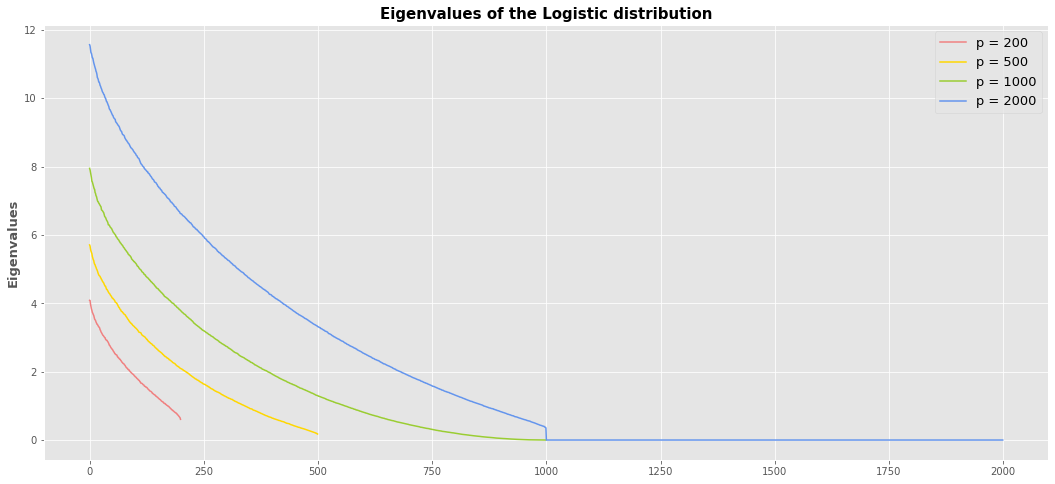

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


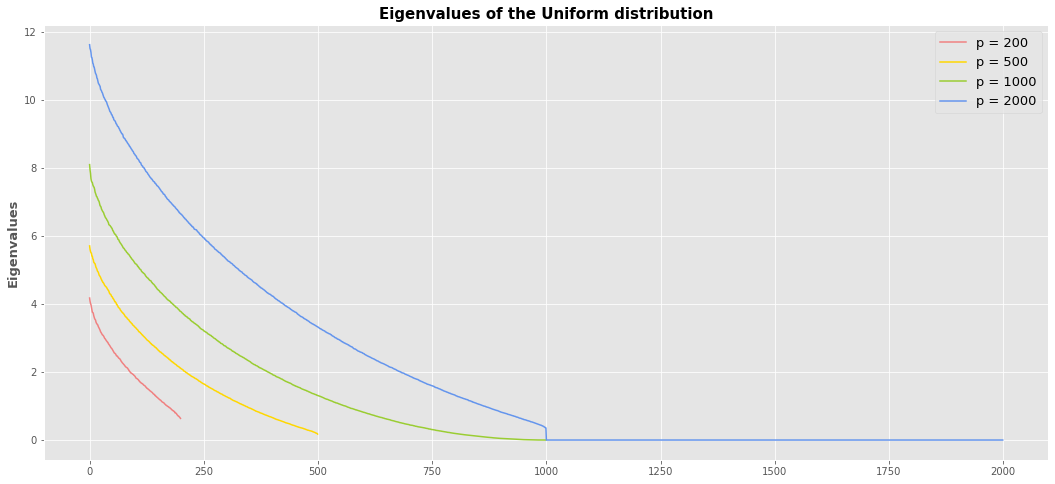

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


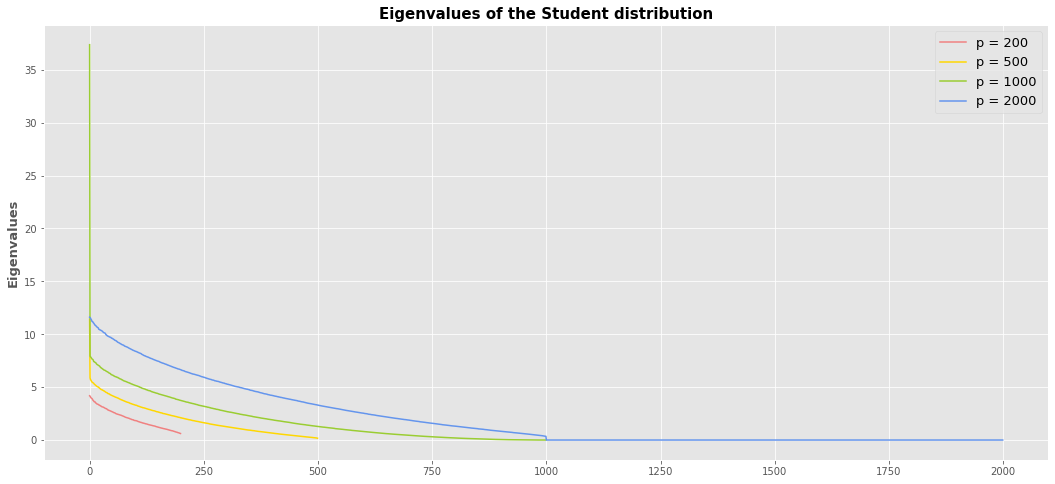

In [49]:
distributions = ['Logistic', 'Uniform', 'Student']
n = 1000
p_values = [200, 500, 1000, 2000]

colors = ['lightcoral', 'gold', 'yellowgreen', 'cornflowerblue']

for dist in distributions:
    plt.figure(figsize=(18, 8))   
    for p in p_values:
        X = matrix_generator(n, p, dist)
        eigenvals = np.linalg.eigvals(X.T @ X / n)
        eigenvals[::-1].sort() # We sort the eigenvalues for more visibility
        plt.plot(eigenvals, color=colors[p_values.index(p)], label=f'p = {p}')
    plt.title(f'Eigenvalues of the {dist} distribution', fontsize=15, fontweight='bold')
    plt.legend(fontsize=13)
    plt.ylabel('Eigenvalues', fontsize=13, fontweight='bold')
    plt.show()

##### We notice that the three plots are extremely similar. It means that the three distributions generate random matrices with close eigenvalues, which could be explained by the fact that they are all non gaussian with the same mean and same standard deviation.

## Exercise 3: Power Method

### Question 6: Algorithm

In [50]:
def power_method(X, n_iter, v):
    for j in range(n_iter):
        u = X @ v
        v = X.T @ u
        v /= np.linalg.norm(v)
        u /= np.linalg.norm(u)
    return u, v

### Question 7: Convergence

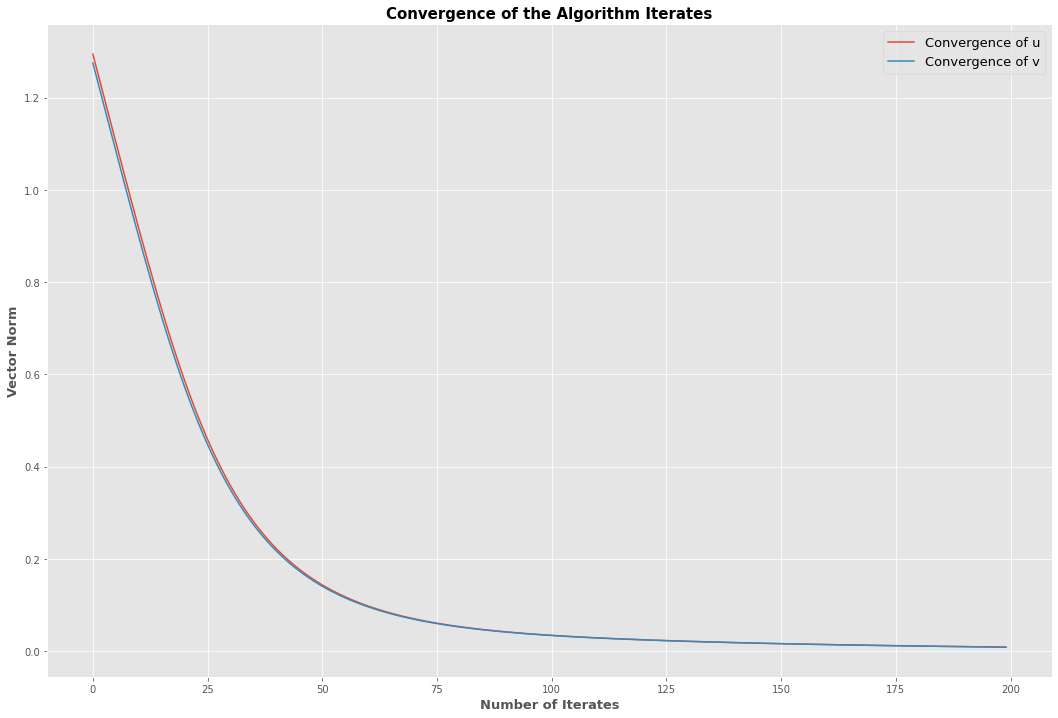

In [51]:
def power_method_convergence(X, n_iter, v):
    
    # We suspect that u and v will respectively converge to the left and right singular vectors
    # associated to the largest singular value of X, therefore we test our hypothesis:
   
    # We compute the theoretical values
    U = svd(X)[0]
    V = svd(X)[2]
    
    # We create the lists where we'll store the errors of the iterates
    error_u = []
    error_v = []
    
    for i in range(n_iter):
        u = X @ v
        v = X.T @ u
        v /= np.linalg.norm(v)
        u /= np.linalg.norm(u)
    # Remark: Singular values are returned in a decreasing order. The vectors associated to the first singular value
    # are thus the ones associated to the largest one.
        error_u.append(np.linalg.norm(u - U.T[0]))
        error_v.append(np.linalg.norm(v - V[0]))
        
    return error_u, error_v

def plot_convergence(convergence_u, convergence_v, title):
    fig = plt.figure(figsize=(18, 12))
    plt.plot(convergence_u, label='Convergence of u')
    plt.plot(convergence_v, label='Convergence of v')
    plt.title(title, fontsize=15, fontweight='bold')
    plt.legend(fontsize=13)
    plt.xlabel('Number of Iterates', fontsize=13, fontweight='bold')
    plt.ylabel('Vector Norm', fontsize=13, fontweight='bold')
    plt.show()

n, p = 100, 2000
n_iter = 200

# We generate our initialization vectors:
X = np.random.normal(scale=np.sqrt(5), size=(n, p))
v = np.random.normal(scale=np.sqrt(5), size=p)

convergence_u, convergence_v = power_method_convergence(X, n_iter, v)

title = 'Convergence of the Algorithm Iterates'
plot_convergence(convergence_u, convergence_v, title)

##### The output u, v from the algorithm either converges to the singular vectors associated to the largest singular value or to their opposite. We can see it by the fact that the error either tends towards 0 or 2, depending on the limit. It can be explained by the fact that the SVD is only unique up to a change in sign of pairs of left and right singular vectors.

### Question 7 (bonus): Mathematical proof

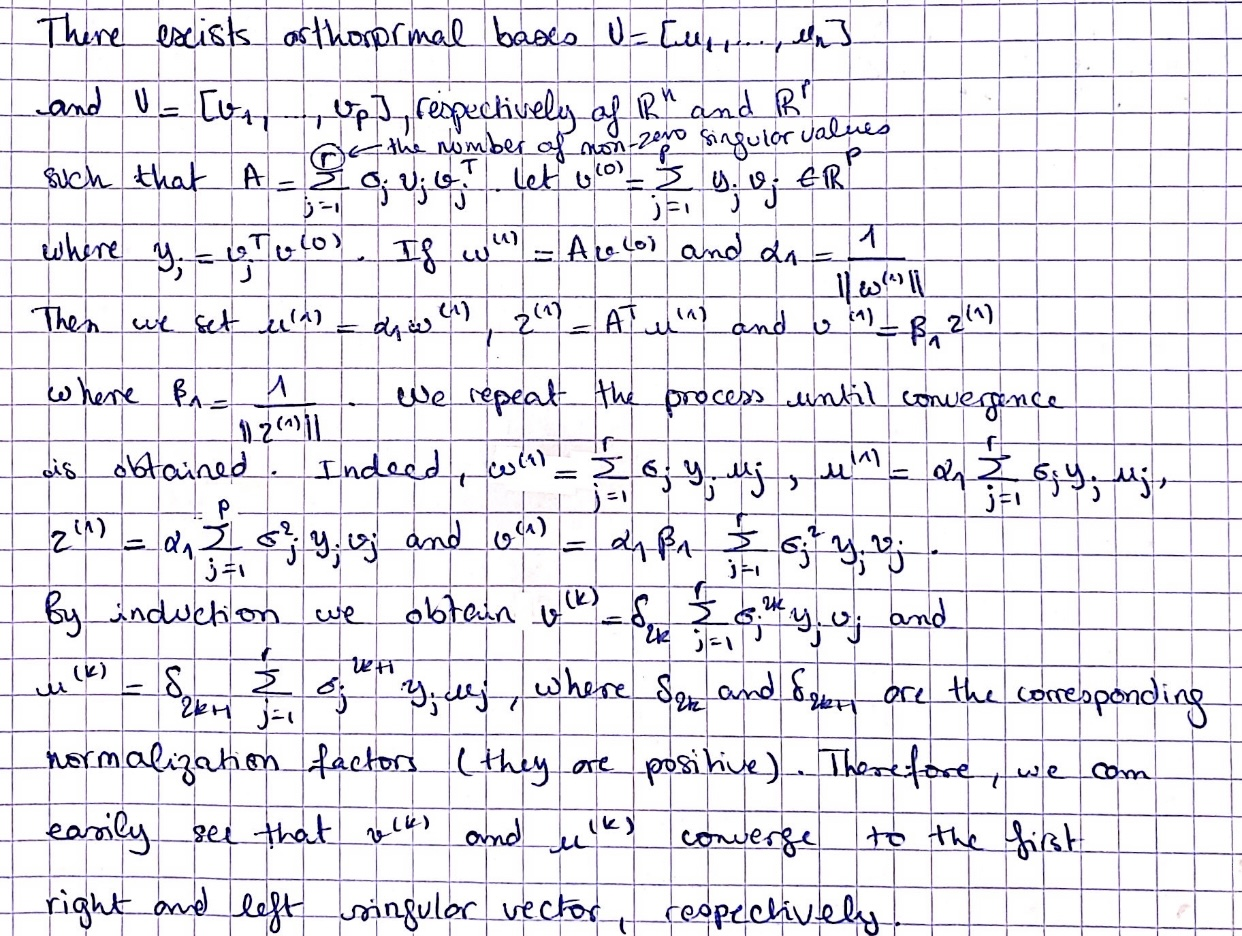

### Question 8: Different limits for different initialization vectors

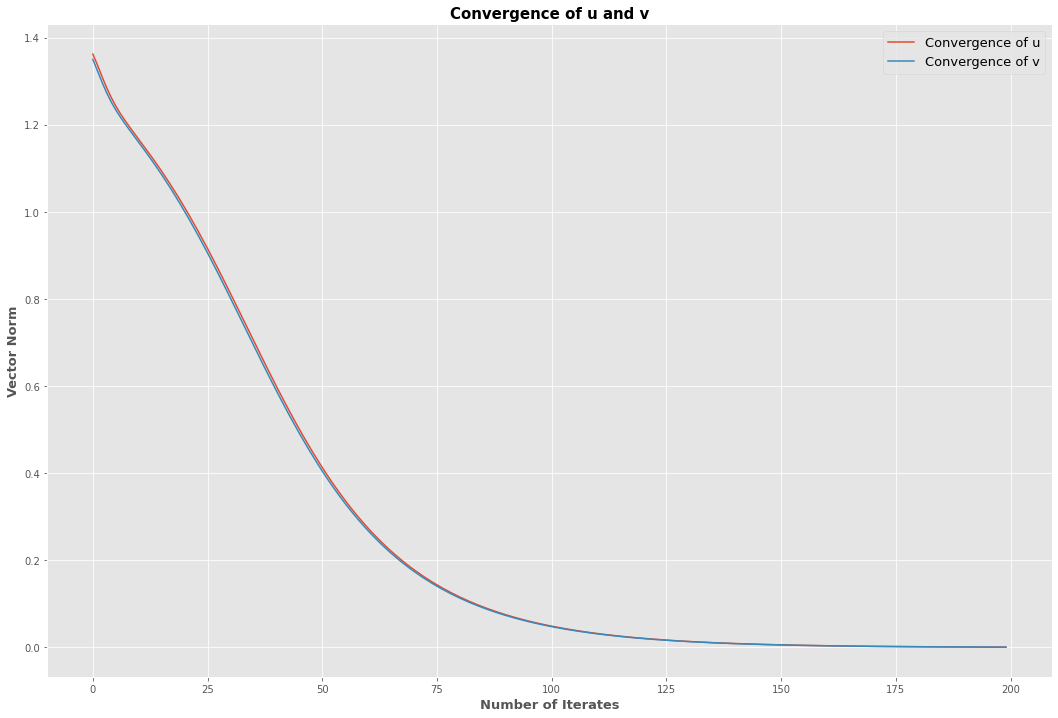

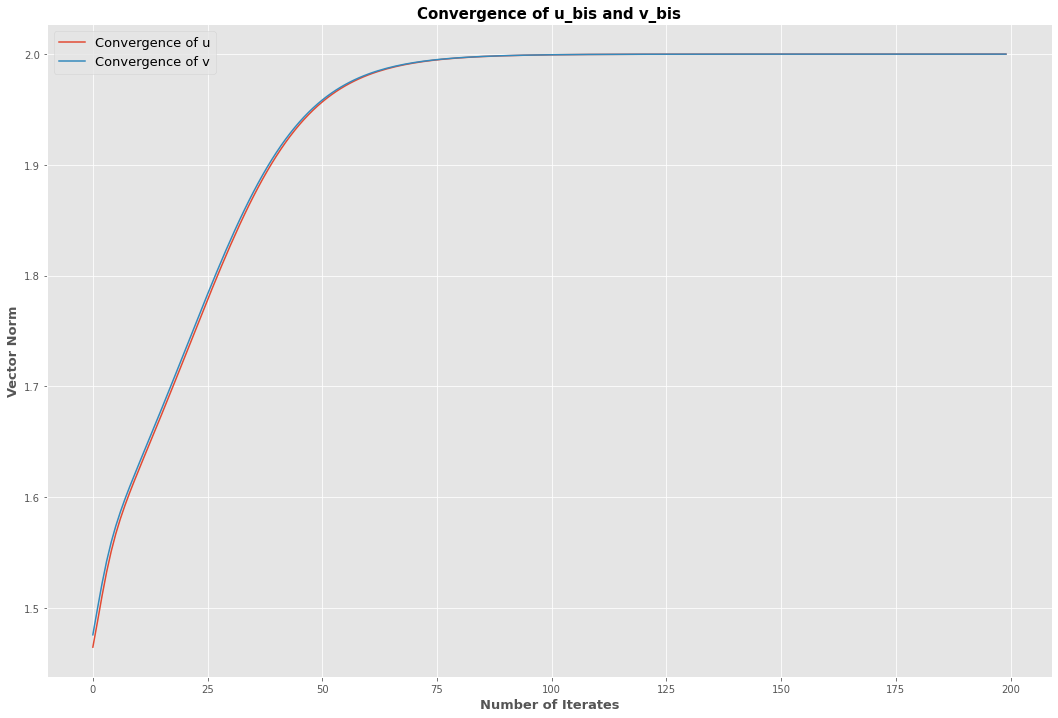

In [52]:
# We generate our initialization vectors:
X = np.random.normal(scale=np.sqrt(5), size=(n, p))
v = np.random.normal(scale=np.sqrt(5), size=p)

# We choose the second initialization vector as the opposite of the first one
v_bis = -v

convergence_u, convergence_v = power_method_convergence(X, n_iter, v)
convergence_u_bis, convergence_v_bis = power_method_convergence(X, n_iter, v_bis)

title_1 = 'Convergence of u and v'
plot_convergence(convergence_u, convergence_v, title_1)

title_2 = 'Convergence of u_bis and v_bis'
plot_convergence(convergence_u_bis, convergence_v_bis, title_2)

##### One of the two sets of initialization vectors converges to the singular vectors associated to the largest singular value of X while the other one converges to their opposite.

### Question 9: Approximation of the largest singular value

In [53]:
# We generate our initialization vectors:
X = np.random.normal(scale=np.sqrt(5), size=(n, p))
v = np.random.normal(scale=np.sqrt(5), size=p)

# We compute the approximation of the singular vectors associated
# to the largest singular value of X:
u, v = power_method(X, n_iter, v) 

# We compute the approximative largest singular value:
largest_sv = u.T @ X @ v

# We compute the theoretical one:
s = svd(X)[1]

print(f'The theoretical largest singular value is {s[0]:.1f}') # Or max(s)
print(f'The approximation we obtain is {largest_sv:.1f}')

The theoretical largest singular value is 122.1
The approximation we obtain is 122.1


### Question 10: Bonus

In [54]:
# We generate our initialization vectors:
X = np.random.normal(scale=np.sqrt(5), size=(n, p))
v = np.random.normal(scale=np.sqrt(5), size=p)

# We compute the approximative second largest singular value:
U, V = power_method(X, n_iter, v)
A = np.array(X - (U.T @ X @ V) * (np.mat(U).T @ np.mat(V)))
U_A, V_A = power_method(A, n_iter, v)
second_largest_sv = U_A.T @ A @ V_A

# We compute the theoretical one:
s = svd(X)[1]

print(f'The theoretical second largest singular value is {s[1]:.1f}')
print(f'The approximation we obtain is {second_largest_sv:.1f}')

The theoretical second largest singular value is 119.9
The approximation we obtain is 119.9


## Exercise 4: Principal Component Analysis (PCA)

### Question 11: Loading and exploring the dataset

In [55]:
url = 'http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv'
df = pd.read_csv(url, sep=';', index_col=0)
df.head()

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


In [56]:
df.shape

(17, 4)

In [57]:
df.isna().sum()

England      0
Wales        0
Scotland     0
N Ireland    0
dtype: int64

In [58]:
df.describe()

,England,Wales,Scotland,N Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


### Question 12: Scaling the dataset

In [59]:
def scale(df): # Standardizes features by removing the mean and scaling to unit variance
    scaler = StandardScaler() 
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [60]:
df_scaled = scale(df)
df_scaled.head()

,England,Wales,Scotland,N Ireland
Cheese,-0.830281,-0.890961,-0.784142,-0.781715
Carcass meat,-0.511509,-0.615412,-0.479033,-0.349984
Other meat,0.490347,0.664561,0.636042,0.335201
Fish,-0.734650,-0.764297,-0.742436,-0.723721
Fats and oils,-0.629910,-0.597634,-0.606344,-0.474563


### Question 13: PCA using 2 PCs + Visualization

In [20]:
def pca_code(df, n_components):
    pca = PCA(n_components=n_components) # Applying PCA with n components
    return pca.fit_transform(df) # Fits and transforms the data to PCA

In [21]:
def two_dim_viz(P): 
    plt.figure(figsize=(15, 7))
    plt.scatter(P[:, 0], P[:, 1])
    
    plt.xlabel('First Component', fontsize=14, fontweight='bold')
    plt.ylabel('Second Component', fontsize=14, fontweight='bold')
    plt.xticks(np.arange(-2, 5, 0.5))
    plt.yticks(np.arange(-0.8, 0.8, 0.2))
    plt.title('Projection of the points on the space generated by the first 2 Principal Axes', fontsize=18, fontweight='bold')
    
    plt.show()

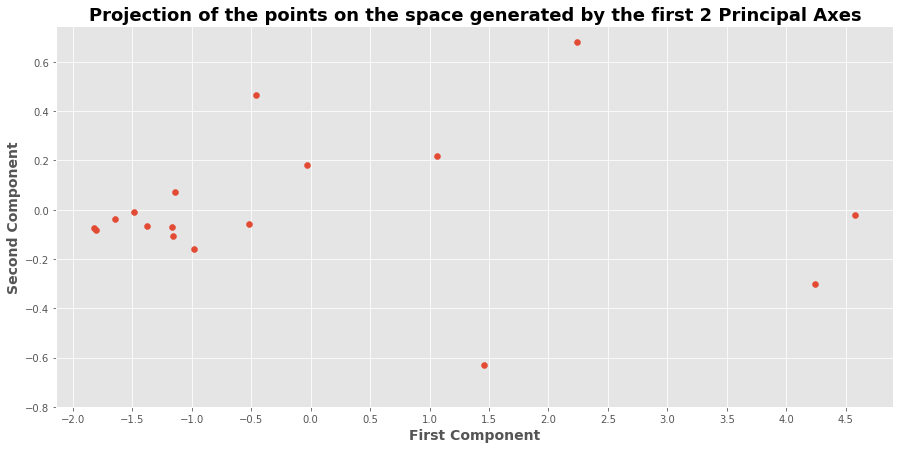

In [22]:
two_dim_viz(pca_code(df_scaled, 2))

### Question 14: PCA using 3PCs + Visualization

In [23]:
def three_dim_viz(P):     
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(P[:, 0], P[:, 1], P[:, 2], s=60)
    
    ax.set_xlabel('First component', fontsize=14, fontweight='bold')
    ax.set_ylabel('Second component', fontsize=14, fontweight='bold')
    ax.set_zlabel('Third component', fontsize=14, fontweight='bold')
    ax.set_title('Projection of the points on the space generated by the first 3 Principal Axes', fontsize=18, fontweight='bold')
    
    plt.show()

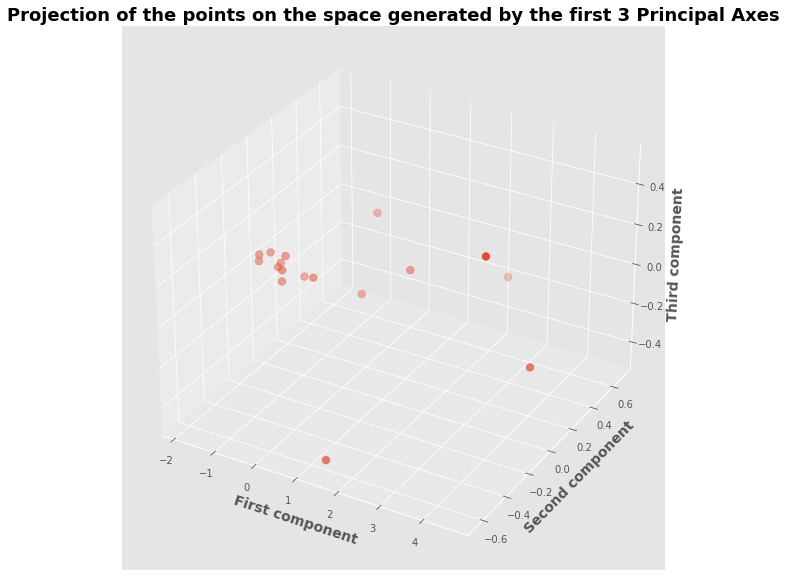

In [24]:
three_dim_viz(pca_code(df_scaled, 3))

### Question 15

### Q.15.a: Eigendecomposition

In [25]:
def eigendecomposition(df, n_components):
    X = df.to_numpy()
    
    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(X.T @ X) 

    # Sorting the eigenvectors by associated eigenvalues in descending order
    index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, index]
    
    return X @ sorted_eigenvectors[:, :n_components]

### Eigendecomposition with the 2 largest PCs

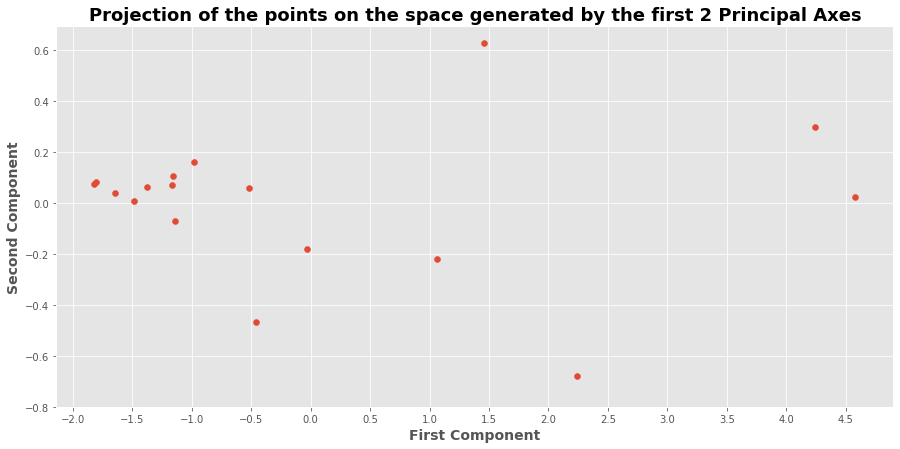

In [26]:
two_dim_viz(eigendecomposition(df_scaled, 2))

###### We notice that this scatter plot is an inverted version of the one obtained with the PCA, it is like looking at our data upside down. Just like the SVD, the eigendecomposition is only unique up to a change in sign of pairs of left and right eigenvectors, and since the PCA is just an eigendecomposition of X.T@ X, there is no guarantee that it does not return different results on the same X every time it is performed.

### Eigendecomposition with the 3 largest PCs

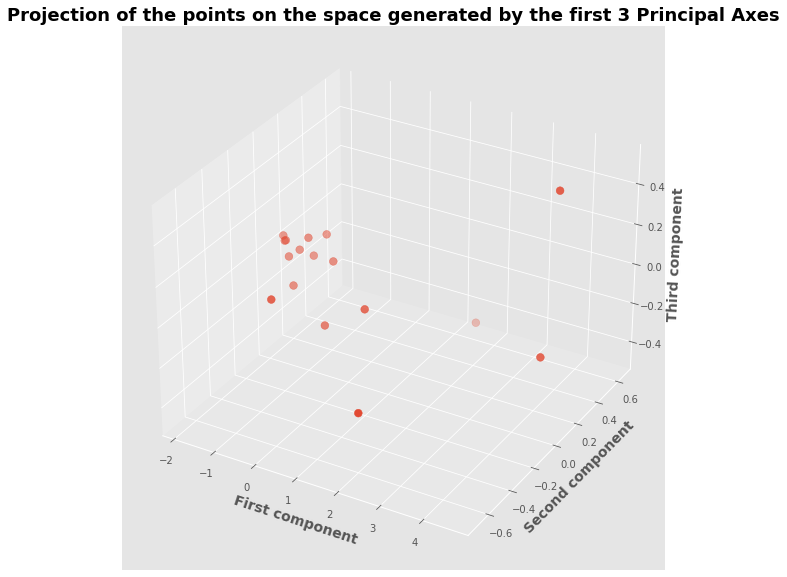

In [27]:
three_dim_viz(eigendecomposition(df_scaled, 3))

##### We notice the same thing as in the 2D graph, for the exact same reasons.

### Q.15.b: Singular Value Decomposition

In [28]:
def svd_code(df, n_components):
    X = df.to_numpy()
    V = np.linalg.svd(X)[2]
    return X @ V.T[:, :n_components]

##### We use V.T (the right-singular vectors of X), as in general, right-singular vectors span the column space of X, while the left-singular vectors U span the row space of X. Therefore, V.T is equal to the new PCs. The dot product gives us a projection of the data X onto the subspace generated by the first n principal components in V.T

### SVD with the 2 largest PCs

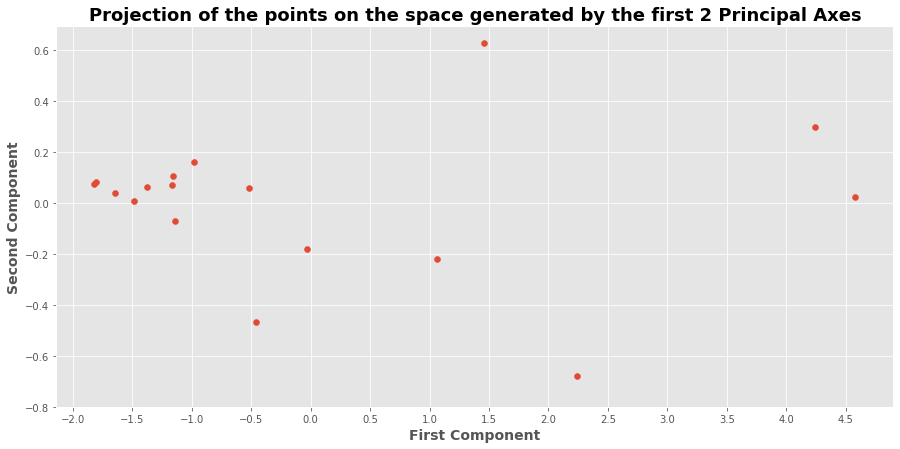

In [29]:
two_dim_viz(svd_code(df_scaled, 2))

###### We notice that this scatter plot is the exact same one as the one obtained with the Eigendecomposition. Therefore, it is still an inverted version of the one obtained with the PCA. As we said before, the SVD is only unique up to a change in sign of pairs of left and right singular vectors, and since the PCA is just an SVD of X, there is no guarantee that it does not return different results on the same X every time it is performed.

### SVD with the 3 largest PCs

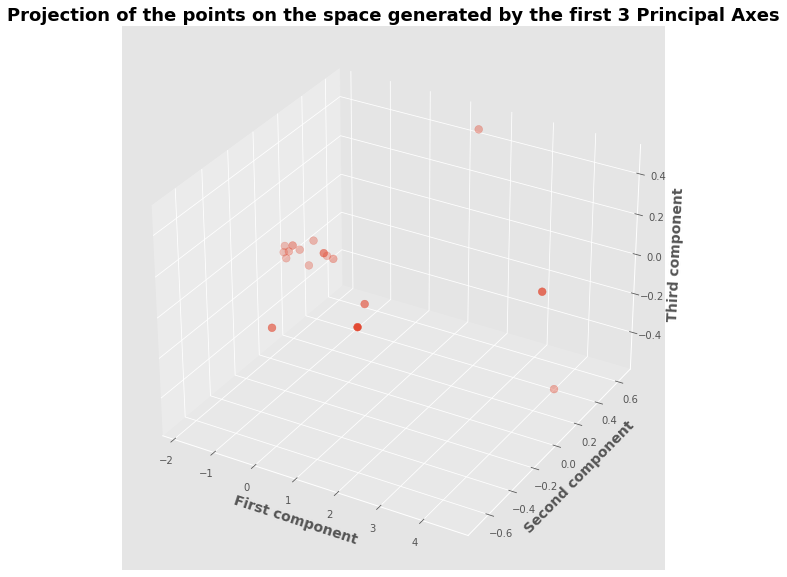

In [30]:
three_dim_viz(svd_code(df_scaled, 3))

###### We notice that this 3d graph is an inverted version of the two other ones, for the same reasons as stated previously.

### Q.15.c: Comparing processing time between Eigendecomposition and SVD methods

In [31]:
def timing(pca_method, df, n_components):

    start = time.time()
    pca_method(df, n_components)
    timing = time.time() - start
    
    print(f"Using {pca_method.__name__}, the computation time was {timing:.5f} seconds.")
    return timing

In [32]:
eig_time = timing(eigendecomposition, df_scaled, 3)
diff = np.abs(timing(svd_code, df_scaled, 3) - eig_time)
print(f"The difference between the two methods is {diff:.5f} seconds.")

Using eigendecomposition, the computation time was 0.00020 seconds.
Using svd_code, the computation time was 0.00017 seconds.
The difference between the two methods is 0.00003 seconds.


# Exercise 5 : Linear regression on auto_mpg dataset

### Question 16 : Loading, exploring and preprocessing the dataset

In [35]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df_auto = pd.read_csv(url, sep=r"\s+", names=columns)
df_auto.drop('car name', axis=1, inplace=True)
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [36]:
df_auto.shape

(406, 8)

In [37]:
df_auto.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [38]:
df_auto.dropna(inplace=True)

df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Question 17 : Adding three binary features to encode the three origins

In [39]:
binary_ft = pd.get_dummies(df_auto.origin)
binary_ft.rename(columns={1.0: 'USA', 2.0: 'Europe', 3.0: 'Japan'}, inplace=True)
df_auto = pd.concat([df_auto, binary_ft], axis=1)
df_auto.drop(columns='origin', axis=1, inplace=True)
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


In [7]:
dummy = pd.get_dummies(df_auto.origin)
df_auto = pd.concat([df_auto, dummy], axis=1)
df_auto.rename(columns={1.0: 'USA', 2.0: 'Europe', 3.0: 'Japan'}, inplace=True)
df_auto.drop(columns='origin', axis=1, inplace=True)
df_auto.columns = [col.replace(' ', '_') for col in df_auto.columns]

df_auto.tail()

AttributeError: 'DataFrame' object has no attribute 'origin'

In [24]:
binary_ft = pd.get_dummies(df_auto.origin)
df_auto = pd.concat([df_auto, binary_ft], axis=1)
df_auto.rename(columns={1.0: 'USA', 2.0: 'Europe', 3.0: 'Japan'}, inplace=True)
df_auto.drop(columns='origin', axis=1, inplace=True)

df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


### Question 18 : Finding Least-Squares Estimator and Prediction Vector using 9 rows

In [25]:
df_sample = df_auto.iloc[[0, 75, 143, 159, 195, 218, 287, 349, 384]]
df_sample

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
83,18.0,4.0,121.0,112.0,2933.0,14.5,72.0,0,1,0
152,32.0,4.0,83.0,61.0,2003.0,19.0,74.0,0,0,1
168,16.0,6.0,250.0,105.0,3897.0,18.5,75.0,1,0,0
204,29.0,4.0,90.0,70.0,1937.0,14.2,76.0,0,1,0
227,33.5,4.0,85.0,70.0,1945.0,16.8,77.0,0,0,1
296,16.9,8.0,350.0,155.0,4360.0,14.9,79.0,1,0,0
360,33.0,4.0,105.0,74.0,2190.0,14.2,81.0,0,1,0
398,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,0,0,1


In [26]:
def lr_model(X, y):    
    lr = LinearRegression().fit(X, y)
    return lr.coef_, lr.predict(X), lr.score(X, y)

In [27]:
X_1 = df_sample.drop('mpg', axis=1) # Stores all predictors in X_1
y_1 = df_sample.mpg # Stores mpg in y_1


# Gets least-squares estimator, prediction vector y and coeff of determination:
theta_1, y_pred_1, r_squared_1 =  lr_model(X_1, y_1) 

print('The least-squares estimator with intercept is:\n', theta_1, end='\n\n')
print('The prediction vector for mpg is:\n', y_pred_1, end='\n\n')
print(f'The coefficient of determination is: {r_squared_1}')

The least-squares estimator with intercept is:
 [ 11.766  -0.201  -0.379   0.015  -1.553   0.929 -11.236   2.379   8.857]

The prediction vector for mpg is:
 [18.  18.  32.  16.  29.  33.5 16.9 33.  32. ]

The coefficient of determination is: 1.0


##### With a coefficient of determination equal to 1, the model is overfitting the data. This could be explained by the fact that the training sample is way too small.

### Question 19 : Finding Least Squares Estimator, Prediction Vector for whole dataset

In [28]:
X = scale(df_auto.drop('mpg', axis=1)) # Scales and stores predictors in X
y = df_auto.mpg # Stores response variable in y 

# Gets least-squares estimator, prediction vector y and coeff of determination:
theta, y_pred, r_squared =  lr_model(X, y)

print(f'The coefficient of determination is: {r_squared:.3f}', end='\n\n')
print('The prediction vector for mpg is:\n', y_pred)

NameError: name 'scale' is not defined

In [42]:
thetas = pd.DataFrame(theta, X.columns, columns=['Coefficients'])
thetas

,Coefficients
cylinders,-0.834272
displacement,2.506019
horsepower,-0.699009
weight,-5.692543
acceleration,0.217956
model year,2.858709
1.0,-0.751539
2.0,0.408048
3.0,0.521830


##### Displacement and Model Year seem to be the most influential variables as their coefficients are the highest ones.
##### Scaling here is necessary because the predictors are all on different scales. For example, without scaling, weight, which has large values could have a much higher impact on fitting the data than cylinders, which has very small values.

### Question 20 : Computing the square norm of the residual vector + Property check

In [43]:
# Computing the square norm of the residual vector
r_norm = np.linalg.norm(y - y_pred) ** 2
print(f'The square norm of the residual vector is: {r_norm:.3f}')

The square norm of the residual vector is: 4187.392


In [44]:
# Computing the left and right hand sides:
left = np.linalg.norm(y - np.mean(y)) ** 2
right = r_norm + np.linalg.norm(y_pred - np.mean(y)) ** 2

# Checking the property:
if np.isclose(left, right):
    print('Both sides are equal, so the property checks !')
else:
    print('The property does not check...')

Both sides are equal, so the property checks !


### Question 21 : Prediction for a new observation

In [45]:
X = df_auto.drop('mpg', axis=1)
new_car = pd.DataFrame([6, 225, 100, 3233, 15.4, 117, 1, 0, 0]).T
new_car.columns = X.columns

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

print(f'The predicted consumption for the new car is {model.predict(new_car)[0]:.1f} mpg')

The predicted consumption for the new car is 53.1 mpg
